In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

This question involves the use of simple linear regression on the `Auto` data set.

In [24]:
auto = pd.read_csv("../Auto.csv")
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [25]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

Use the `sm.OLS()` function to perform a simple linear regression with mpg as the response and `horsepower` as the predictor. Use the `summarize()` function to print the results. Comment on the output. For example:
- Is there a relationship between the predictor and the response?
- How strong is the relationship between the predictor and the response?
- Is the relationship between the predictor and the response positive or negative?
- What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95 % confidence and prediction intervals?

In [26]:
from statsmodels.tools.tools import add_constant

X = add_constant(auto[["horsepower"]])
y = auto["mpg"]

model = sm.OLS(y, X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           7.03e-81
Time:                        21:59:50   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answer:
1. Yes, there exists a relationship between the predictor and the response. The F-statistic is greater than 1 and the p-value of the horsepower coefficient is 0.
2.  According to the R-squared value, ~60% of the variance in the response can be explained by the horsepower.
3. The relationship is negative. For every added HP, the value of mpg drops by 0.1578.
4. See below.

In [27]:
results.get_prediction(np.array([[1, 98]])).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


Plot the response and the predictor in a new set of axes `ax`. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.

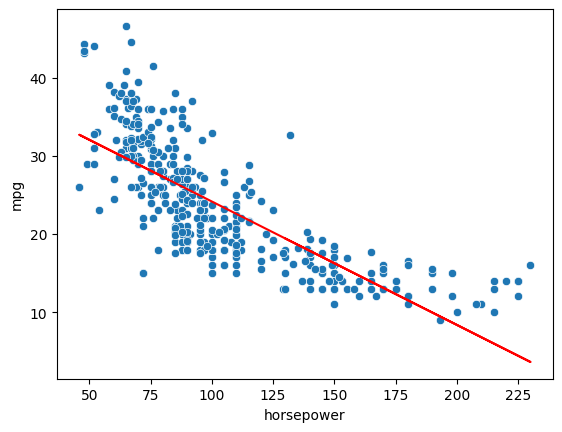

In [28]:
sns.scatterplot(auto, x="horsepower", y="mpg")
plt.plot(X["horsepower"], results.fittedvalues, color="red");

Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

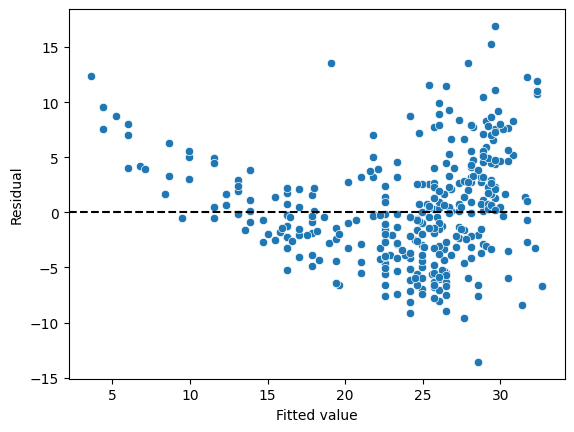

In [29]:
sns.scatterplot(x=results.fittedvalues, y=results.resid)
plt.axhline(y=0, color="k", ls="--")
plt.xlabel('Fitted value')
plt.ylabel('Residual');


Answer: On the basis of the residual plot, there is some evidence of non-linearity.

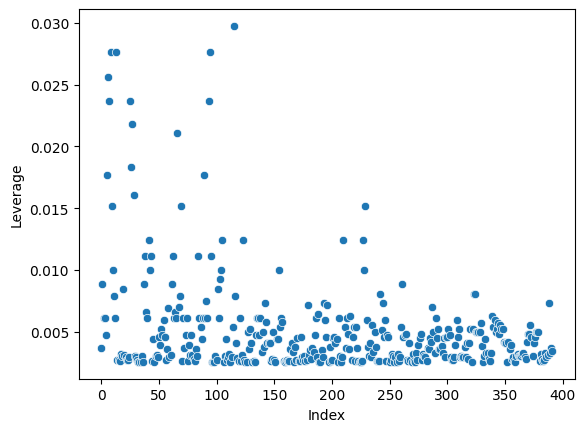

In [30]:
influence = results.get_influence()
sns.scatterplot(x=X.index, y=influence.hat_matrix_diag)
plt.xlabel('Index')
plt.ylabel('Leverage');

This question involves the use of multiple linear regression on the Auto data set.

Produce a scatterplot matrix which includes all of the variables in the data set.

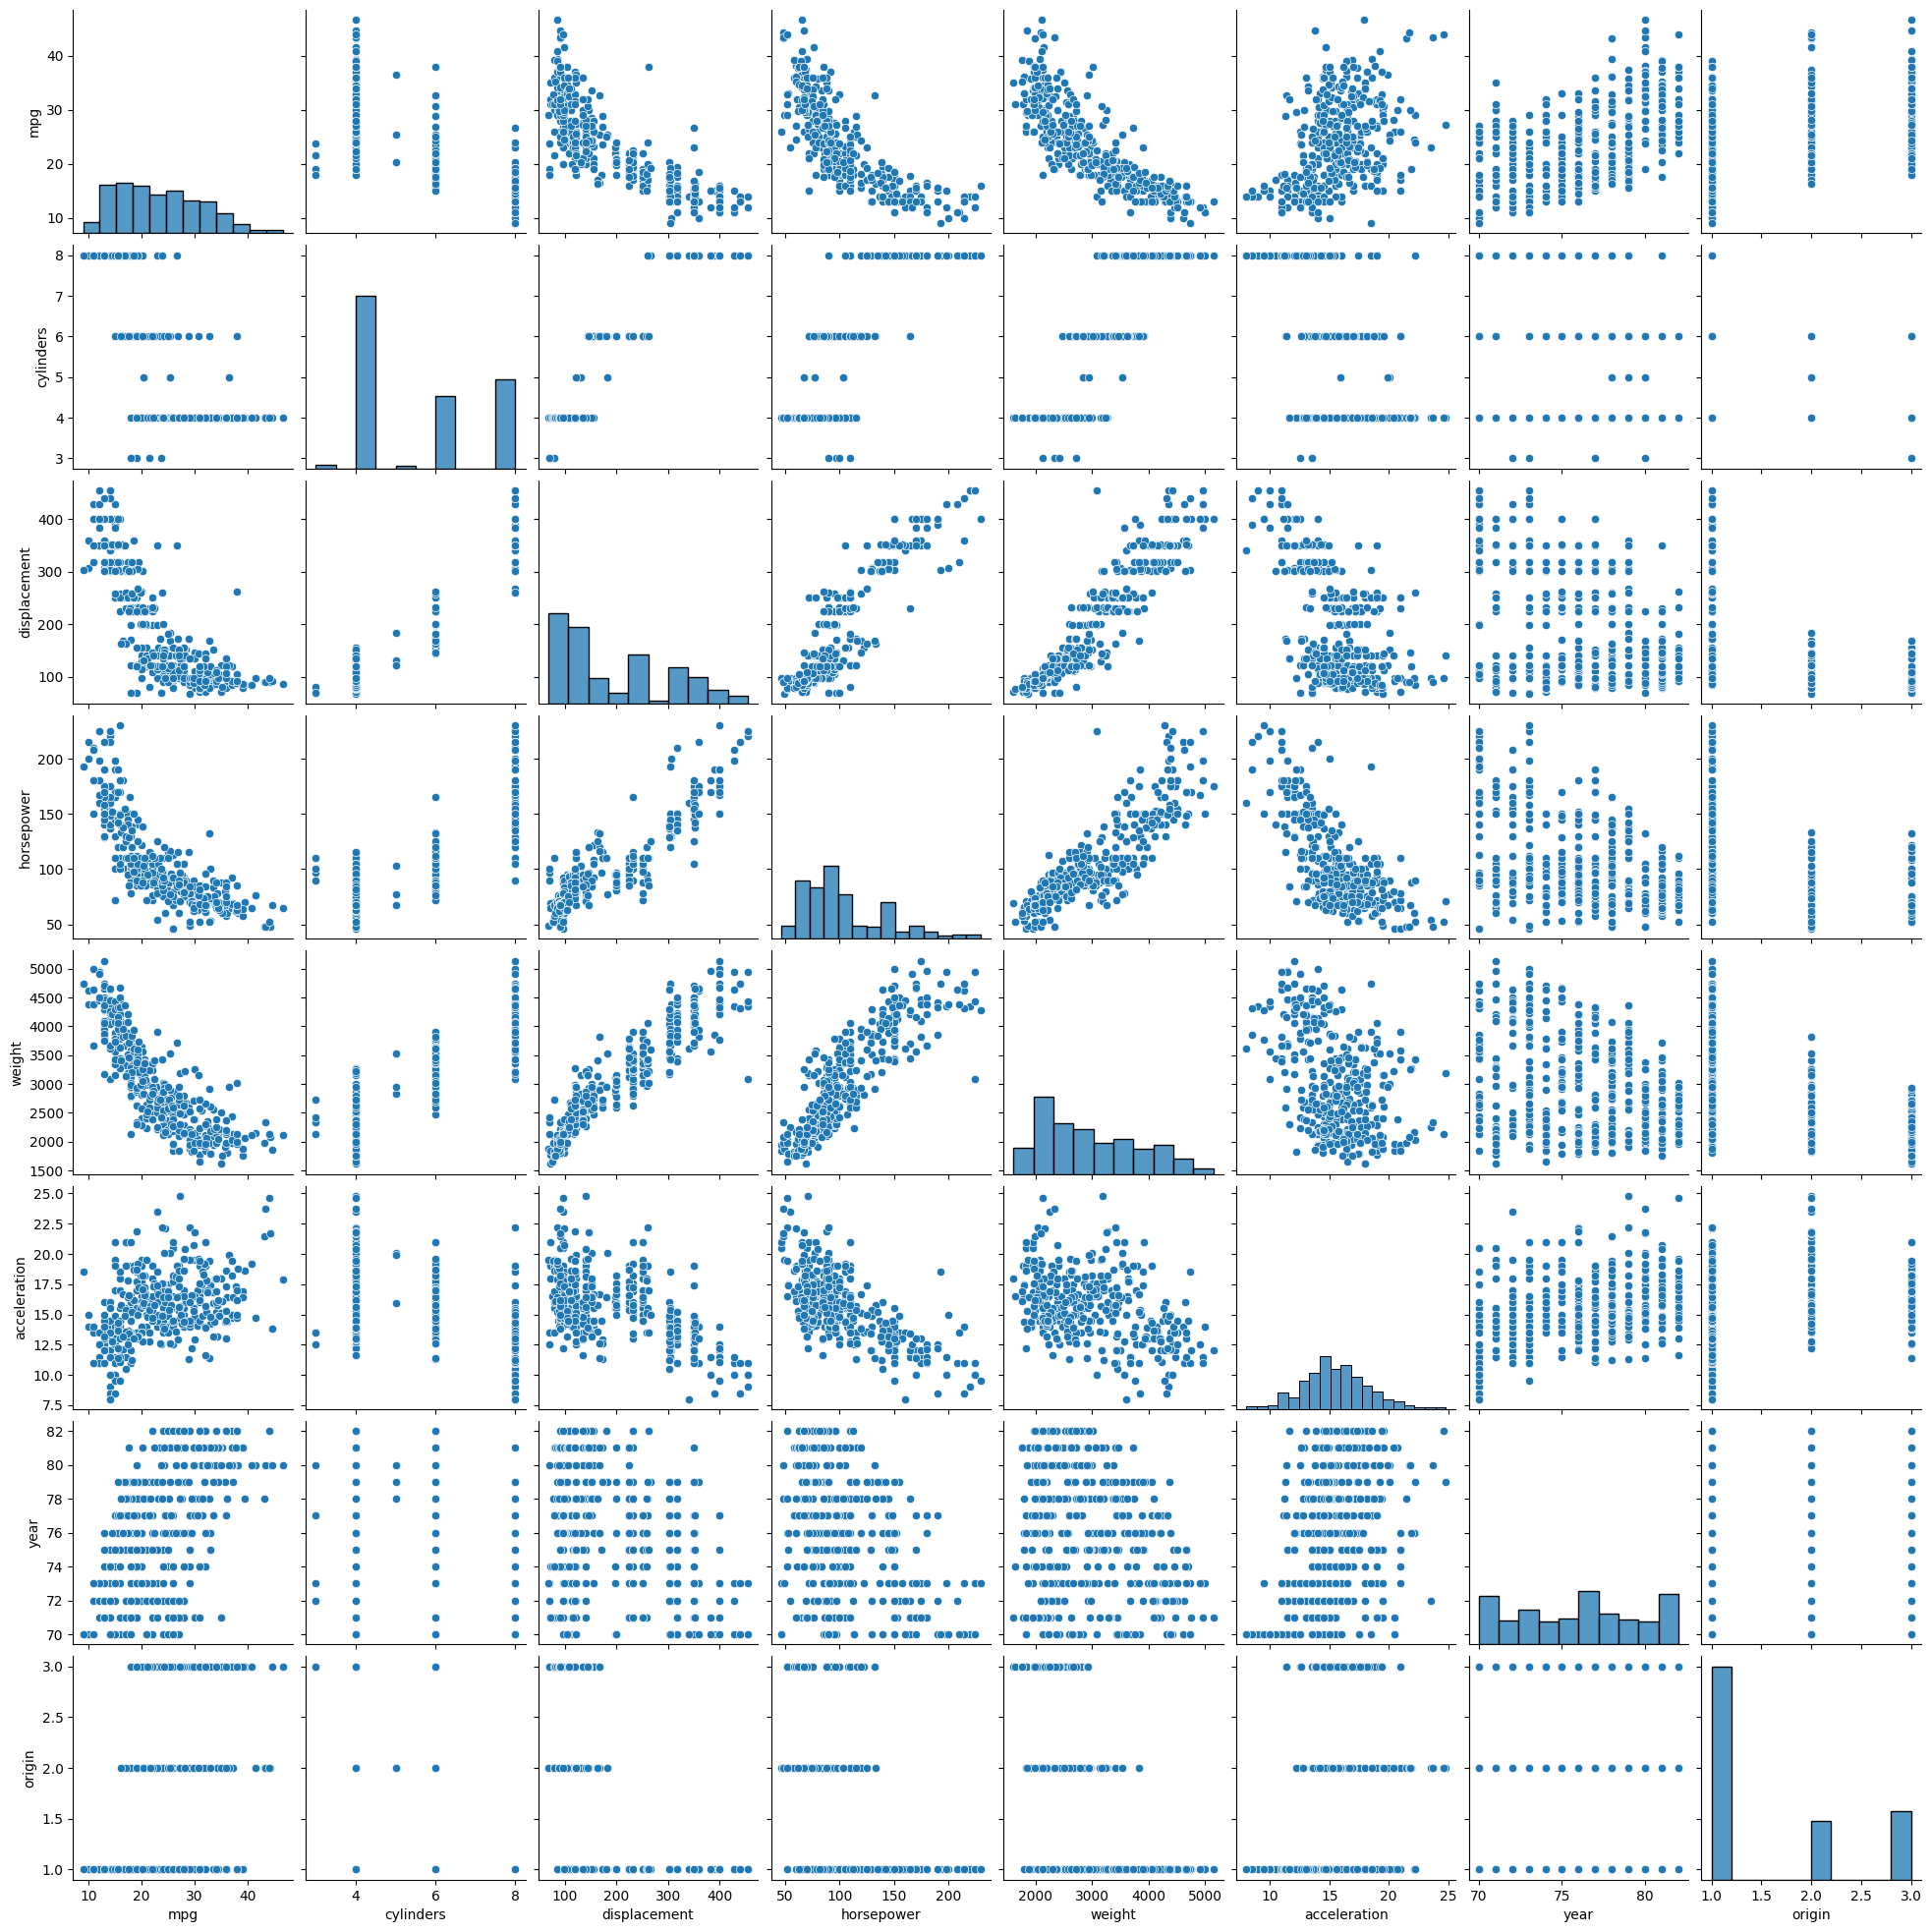

In [31]:
sns.pairplot(auto);

Compute the matrix of correlations between the variables using the `DataFrame.corr()` method.

In [32]:
auto.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


Use the `sm.OLS()` function to perform a multiple linear regression with `mpg` as the response and all other variables except name as the predictors. Use the `summarize()` function to print the results. Comment on the output. For instance:
- Is there a relationship between the predictors and the response? Use the `anova_lm()` function from `statsmodels` to answer this question.
- Which predictors appear to have a statistically significant relationship to the response?
- What does the coefficient for the `year` variable suggest?

In [33]:
X = add_constant(auto.drop(columns=["name", "mpg"]))
y = auto["mpg"]

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          2.04e-139
Time:                        22:00:11   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Answers:
- Yes, there is a relationship between the predictors and the response because the F-statistic is much larger than 1.
- The predictors that have a statistically significant relationship to the response are `displacement`, `weight`, `year` and `origin`.
- The coefficient for the year variable suggests that `mpg` increases by 0.75 every year.

Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

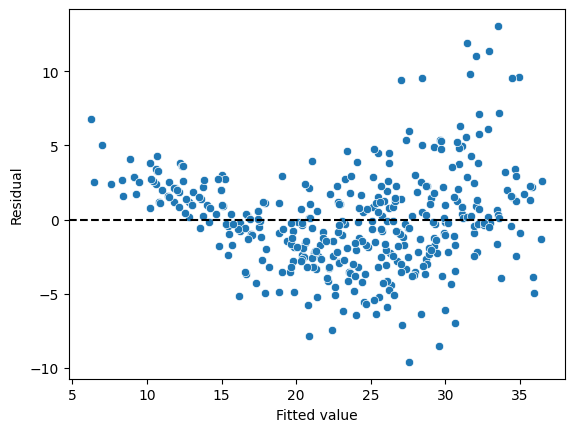

In [34]:
sns.scatterplot(x=results.fittedvalues, y=results.resid)
plt.axhline(y=0, color="k", ls="--")
plt.xlabel('Fitted value')
plt.ylabel('Residual');

Answer: On the basis of the residual plot, there is some evidence of non-linearity.

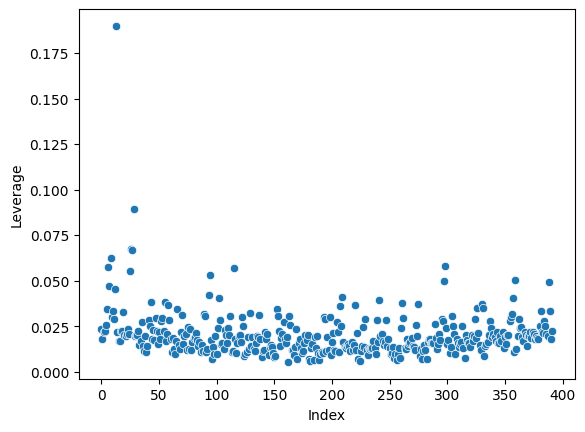

In [35]:
influence = results.get_influence()
sns.scatterplot(x=X.index, y=influence.hat_matrix_diag)
plt.xlabel('Index')
plt.ylabel('Leverage');

In [36]:
np.argmax(influence.hat_matrix_diag)

13

Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [37]:
from sklearn.preprocessing import PolynomialFeatures

data = auto.drop(columns=["name", "mpg"])
poly = PolynomialFeatures(interaction_only=True)

X = pd.DataFrame(poly.fit_transform(data), columns=poly.get_feature_names_out())
y = auto["mpg"]

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          4.01e-155
Time:                        22:00:12   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
1                            35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
cylinders weight              0.0004      0.001      0.399      0.690      -0.001       0.002
cylinders acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
cylinders year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
cylinders origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration origin           0.4583      0.157      2.926      0.004       0.150       0.766
year origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

transformer = ColumnTransformer(
    [
        ("original", "passthrough", data.columns),
        (
            "log",
            FunctionTransformer(
                np.log1p,
                feature_names_out="one-to-one",
            ),
            data.columns,
        ),
        (
            "sqrt",
            FunctionTransformer(
                np.sqrt,
                feature_names_out="one-to-one",
            ),
            data.columns,
        ),
        (
            "square",
            FunctionTransformer(
                np.square,
                feature_names_out="one-to-one",
            ),
            data.columns,
        ),
    ]
)

X = pd.DataFrame(transformer.fit_transform(data), columns=transformer.get_feature_names_out())
y = auto["mpg"]

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          2.79e-164
Time:                        22:00:12   Log-Likelihood:                -914.65
No. Observations:                 392   AIC:                             1881.
Df Residuals:                     366   BIC:                             1985.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
original__cylinders     1.092e+04   4.35e+04      0.251      0.802   -7.45e+04    9.64e+04
original__displacement     0.5141      1.188      0.433      0.666      -1.823       2.851
original__horsepower      -4.9600      3.161     -1.569      0.118     -11.176       1.256
original__weight           0.6135      0.408      1.504      0.133      -0.188       1.415
original__acceleration   -11.8848    140.393     -0.085      0.933    -287.964     264.194
original__year          4.828e+04   2.47e+04      1.953      0.052    -323.522    9.69e+04
original__origin        2.111e+06   1.17e+06      1.798      0.073   -1.97e+05    4.42e+06
log__cylinders          7.199e+04   2.81e+05      0.256      0.798   -4.81e+05    6.25e+05
log__displacement          4.9945    113.638      0.044      0.965    -218.471     228.460
log__horsepower         -256.8770    171.952     -1.494      0.136    -595.015      81.261
log__weight              982.5235    609.041      1.613      0.108    -215.136    2180.183
log__acceleration         50.2492   1415.777      0.035      0.972   -2733.829    2834.328
log__year               1.905e+06   9.94e+05      1.915      0.056   -5.08e+04    3.86e+06
log__origin            -3.556e+05   1.98e+05     -1.798      0.073   -7.45e+05    3.32e+04
sqrt__cylinders        -9.808e+04   3.86e+05     -0.254      0.799   -8.56e+05     6.6e+05
sqrt__displacement       -11.7959     44.295     -0.266      0.790     -98.901      75.309
sqrt__horsepower         133.1376     88.061      1.512      0.131     -40.031     306.306
sqrt__weight             -93.6384     59.684     -1.569      0.118    -211.005      23.728
sqrt__acceleration        20.2734   1614.700      0.013      0.990   -3154.981    3195.528
sqrt__year             -1.133e+06   5.86e+05     -1.934      0.054   -2.28e+06    1.89e+04
sqrt__origin           -3.407e+06   1.89e+06     -1.798      0.073   -7.13e+06    3.18e+05
square__cylinders        -98.6607    408.459     -0.242      0.809    -901.882     704.561
square__displacement      -0.0003      0.000     -0.646      0.519      -0.001       0.001
square__horsepower         0.0038      0.002      1.662      0.097      -0.001       0.008
square__weight         -1.485e-05    1.1e-05     -1.351      0.178   -3.65e-05    6.76e-06
square__acceleration       0.1848      0.682      0.271      0.787      -1.157       1.526
square__year             -52.9381     26.591     -1.991      0.047    -105.229      -0.648
square__origin         -1.851e+05   1.03e+05     -1.798      0.073   -3.88e+05    1.73e+04
==============================================================================
Omnibus:                       39.771   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.171
Skew:                    

This question should be answered using the `Carseats` data set.

In [39]:
from ISLP import load_data

carseats = load_data('Carseats')
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`.

In [40]:
X = sm.add_constant(pd.get_dummies(carseats[["Price", "Urban", "US"]], drop_first=True))
y = carseats["Sales"]

results = sm.OLS(y, X.astype(float)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           2.39e-23
Time:                        22:00:12   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_Yes     -0.0219      0.272     -0.081      0.936      -0.556       0.512
US_Yes         1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

- const: In the absence of any other variable, a carseat will be sold about 13,000 times.
- Price: For every increase of one price unit, carseat sales drop by about 55 units.
- Urban: No relationship between store location (urbal vs rural) and carseat sales.
- US: If the store is in the US, carseat sales increase by 1,200 units.

Write out the model in equation form, being careful to handle
the qualitative variables properly.

In [41]:
(results.params * X).sum(axis=1)

0      7.687064
1      9.702041
2      9.865418
3      8.939617
4      6.050820
         ...   
395    7.251393
396    7.708980
397    5.563168
398    9.048535
399    7.687064
Length: 400, dtype: float64

For which of the predictors can you reject the null hypothesis H0 : βj = 0?

The null hypothesis can be rejected for `const`, `Price` and `US` according to their p-values above.

On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [42]:
X = sm.add_constant(pd.get_dummies(carseats[["Price", "US"]], drop_first=True))
y = carseats["Sales"]

results = sm.OLS(y, X.astype(float)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           2.66e-24
Time:                        22:00:12   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US_Yes         1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How well do the models in (a) and (e) fit the data?

Neither model fits the data very well as can be seen by their low value for R-squared of 0.239.

Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           2.66e-24
Time:                        22:00:12   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US_Yes         1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Is there evidence of outliers or high leverage observations in the model from (e)?

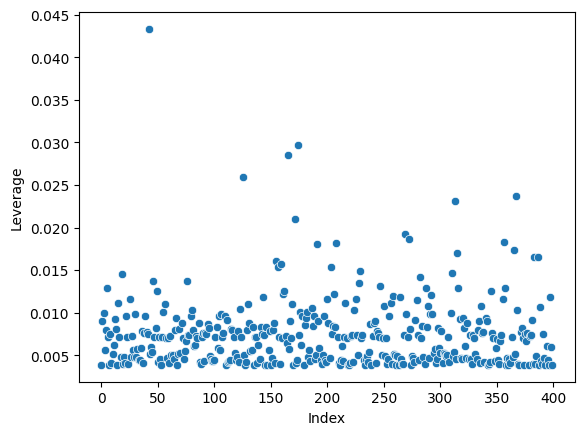

In [44]:
influence = results.get_influence()
sns.scatterplot(x=X.index, y=influence.hat_matrix_diag)
plt.xlabel('Index')
plt.ylabel('Leverage');